In [ ]:
#Google Colab dependencies; to load the images, the dataset has to be uploaded to Google drive.
#Google Drive is then mounted in order to be accessed by Jupyter Notebook.
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#We'll be using OpenCV's implementation of the Viola & Jones feature detection algorithm.
import cv2
import csv
from os import listdir
cv2.__version__

'4.1.2'

In [ ]:
#Initialize performance-related counter variables.
true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0

In [ ]:
# Change the TRIAL_NUM variable depending on which trial from the report paper should be run.
# Also, change the custom_cascade_path variable in trial 3 and 4 to the location on the mounted Google Drive where the custom cascade file is stored.

TRIAL_NUM = 4
custom_cascade_path = '/content/drive/MyDrive/cascade_w20_h10_numStages20_numPos1000.xml'

if TRIAL_NUM == 1:
  cascade_path = cv2.data.haarcascades + 'haarcascade_smile.xml'
  param_scale = 1.1
  param_neighbors = 3
elif TRIAL_NUM == 2:
  cascade_path = cv2.data.haarcascades + 'haarcascade_smile.xml'
  param_scale = 1.3
  param_neighbors = 10
elif TRIAL_NUM == 3:
  cascade_path = custom_cascade_path
  param_scale = 1.1
  param_neighbors = 3
elif TRIAL_NUM == 4:
  cascade_path = custom_cascade_path
  param_scale = 1.1
  param_neighbors = 5

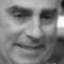

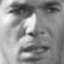

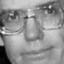

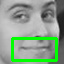

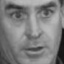

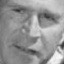

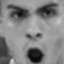

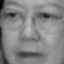

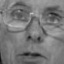

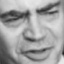

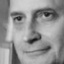

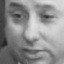

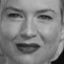

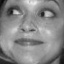

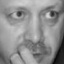

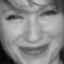

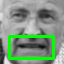

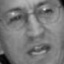

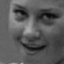

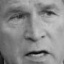

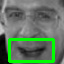

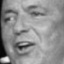

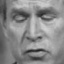

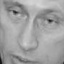

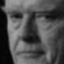

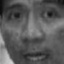

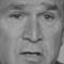

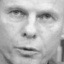

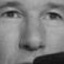

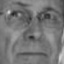

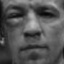

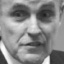

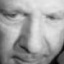

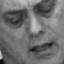

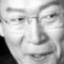

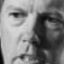

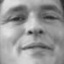

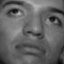

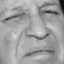

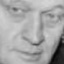

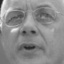

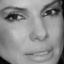

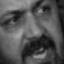

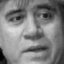

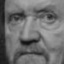

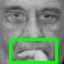

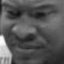

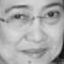

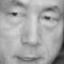

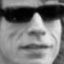

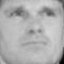

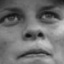

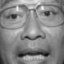

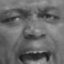

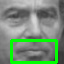

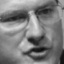

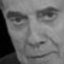

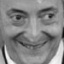

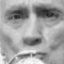

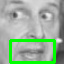

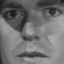

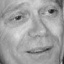

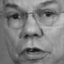

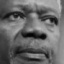

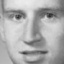

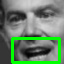

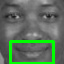

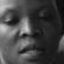

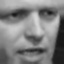

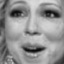

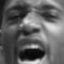

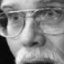

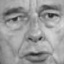

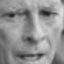

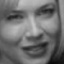

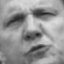

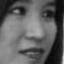

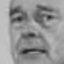

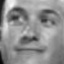

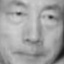

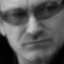

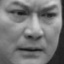

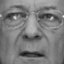

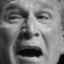

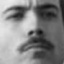

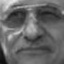

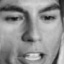

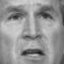

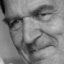

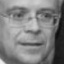

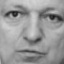

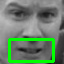

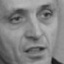

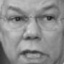

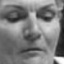

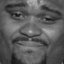

In [ ]:
#Predict negative samples

# First, a smile cascade is instantiated. 
# Then, the default/custom cascade is loaded into the CascadeClassifier object depending on the TRIAL_NUM specified.

smile_cascade = cv2.CascadeClassifier()
smile_cascade.load(cascade_path)

#Change this directory path depending on where on the mounted Google Drive the negatives folder of the dataset is stored.
negatives_directory = '/content/drive/MyDrive/smile_dataset/negatives/negatives7'

#Iterate over all negative images from the dataset, run the classifier on each image, and increment the true_negatives and false_positives variables accordingly.
counter = 0
for filename in listdir(negatives_directory):
  img = cv2.imread(negatives_directory + '/' + filename)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  smile = smile_cascade.detectMultiScale(gray, param_scale, param_neighbors)
  
  if counter%100==0:
    for (ex,ey,ew,eh) in smile:
        cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    cv2_imshow(img)
  if isinstance(smile, tuple):
    true_negatives = true_negatives+1
  else:
    false_positives = false_positives+1
  counter = counter + 1

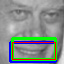

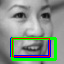

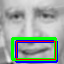

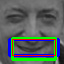

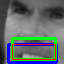

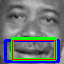

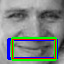

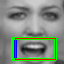

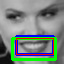

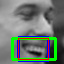

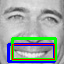

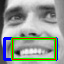

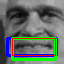

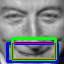

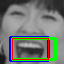

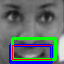

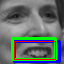

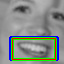

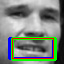

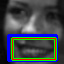

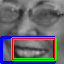

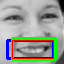

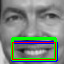

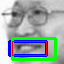

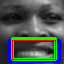

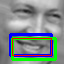

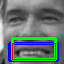

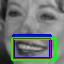

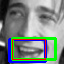

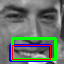

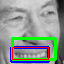

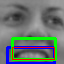

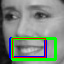

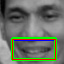

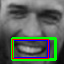

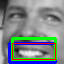

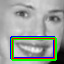

In [ ]:
#Predict positive samples

#Change this directory path depending on where on the mounted Google Drive the negatives folder of the dataset is stored.

positives_directory = '/content/drive/MyDrive/smile_dataset/positives'

file = open('/content/drive/MyDrive/smile_dataset/positives/smiles_01_pos.idx')

csvreader = csv.reader(file, delimiter=' ')

#load ground truth smile locations for visualisation purposes

pos_smile_locations = []

for row in csvreader:
        pos_smile_locations.append(row)

#Iterate over all positive images from the dataset, run the classifier on each image, and increment the true_positives and false_negatives variables accordingly.

counter = 0
for row in pos_smile_locations:
  img = cv2.imread(positives_directory + '/' + row[0])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  x_pos = int(row[2])
  y_pos = int(row[3])
  width = int(row[4])
  height = int(row[5])
  cv2.rectangle(img,(x_pos,y_pos),(x_pos+width,y_pos+height),(255,0,0),2)

  if counter%100==0:
    for (ex,ey,ew,eh) in smile:
      cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
      max_x = ex if x_pos<ex else x_pos
      max_y = ey if y_pos<ey else y_pos
      min_w = min(ex+ew, x_pos+width)
      min_h = min(ey+eh, y_pos+height)
      cv2.rectangle(img,(max_x, max_y), (min_w, min_h), (0,0,255),1)
    cv2_imshow(img)
  if isinstance(smile, tuple):
    false_negatives = false_negatives+1
  else:
    true_positives = true_positives+1
  counter = counter + 1

# New Section

In [ ]:
#Print results

positives_precision = true_positives/(true_positives+false_positives)
positives_recall = true_positives/(true_positives+false_negatives)
positives_f1 = 2 * positives_precision * positives_recall / (positives_precision + positives_recall)
negatives_precision = true_negatives/(true_negatives+false_negatives)
negatives_recall = true_negatives/(true_negatives+false_positives)
negatives_f1 = 2 * negatives_precision * negatives_recall / (negatives_precision + negatives_recall)


print("true positives: " + str(true_positives))
print('false positives: ' + str(false_positives))
print("true negatives: " + str(true_negatives))
print('false negatives: ' + str(false_negatives))

print('precision of positives: ' + str(positives_precision))
print('recall of positives: ' + str(positives_recall))

print('precision of negatives: ' + str(negatives_precision))
print('recall of negatives: ' + str(negatives_recall))

print('F1 score of positives: ' + str(positives_f1))
print('F1 score of negatives: ' + str(negatives_f1))

print('accuracy: ' + str((true_positives+true_negatives)/(true_positives+true_negatives+false_positives+false_negatives)))

true positives: 3606
false positives: 689
true negatives: 8841
false negatives: 0
precision of positives: 0.839580908032596
recall of positives: 1.0
precision of negatives: 1.0
recall of negatives: 0.9277019937040923
F1 score of positives: 0.9127958486267561
F1 score of negatives: 0.9624952370584073
accuracy: 0.9475487210718636
